In [ ]:
#! -*- coding: utf-8 -*-

In [ ]:
%matplotlib inline

# GWpyでノイズを学習する

私たちがすでに見てきたことは、すでに知っているシグナルを研究することに関連しています。
私たちは明日、最初にそれらの信号を実際に見つける方法についてははるかに詳しく見ていきますが、今は私がそのことを確実にしてくれるようにしましょう。

このセクションでは、いくつかの種類のノイズについて学びます。このセクションでは、すでに知っていた信号を解決するためにたくさんのフィルタリングを行う必要がありました。

これまでと同じツールを使用して、一般的に「グリッチ」と呼ばれる過渡ノイズを見つけて調べることができます。

## ハードウェアインジェクション

しかし、まず、ちょっと寄り道。

LIGOデータには、データ処理および分析ワークフローの有効性をテストするために使用されるハードウェアインジェクションと呼ばれるシミュレートされた信号が含まれています。詳細は、O1のハードウェアインジェクションページを参照してください：https://losc.ligo.org/o1_inj/

私たちは、これらを視覚化するために、「_Tables of transient injections_」のリンクを使用することができます。

H1テーブルの最初のいくつかのインジェクションはバーストで、「ホワイトノイズ」または「サインガウス」のいずれかを見てみましょう。

/opt/conda/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


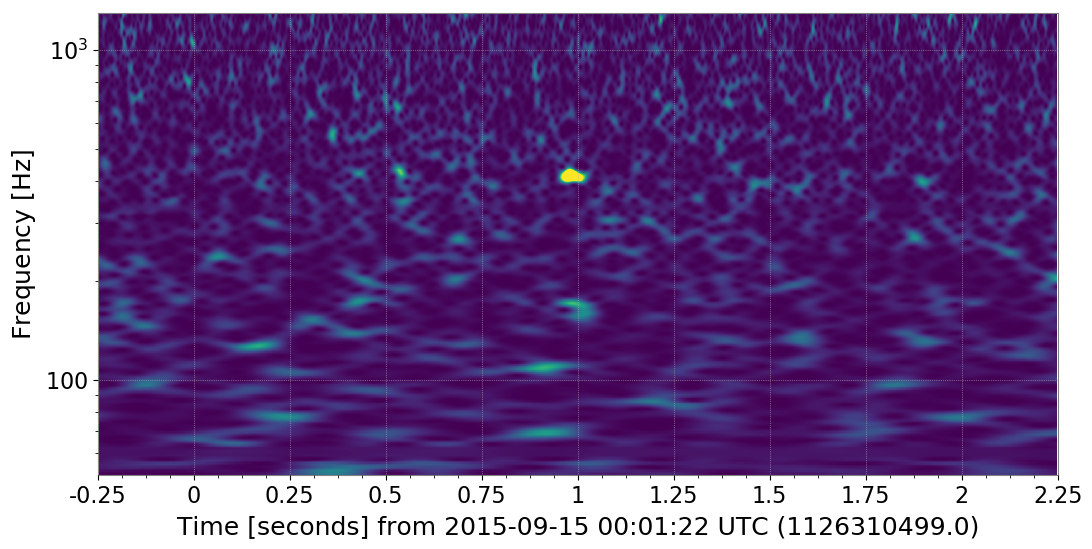

In [1]:
# format our times
injstart, injend = 1126310499.75, 1126310500.25
datastart = int(injstart) - 4
dataend = int(injend) + 4

# fetch the data
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', datastart, dataend, cache=True)

# generate the Q-transform
qtrans = hdata.q_transform(outseg=(injstart-1, injend+1))

# plot
plot = qtrans.plot(vmin=0, vmax=20, yscale='log')
plot.show()

私たちは、Q変換の最も大きなピクセルを照合することによって、インジェクションの正確なGPS時刻と周波数を決定することができます。

In [2]:
idx = qtrans.argmax()

[`argmax`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) 関数はフラット化された配列内の最も大きなピクセルのインデックスを返します。したがって、これを時間軸上のインデックスと周波数軸上のインデックスに変換する必要があります。
[`numpy.unravel_index`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unwrap_index.html)
を実行して、基礎となる`'times' と　'frequencies'の配列を抽出すれば良い


In [3]:
# get indices for times and frequencies
from numpy import unravel_index
timeid, freqid = unravel_index(idx, qtrans.shape)

# extract values (using .value to extract as a float)
peakgps = qtrans.times[timeid].value
peakfrequency = qtrans.frequencies[freqid].value
print(peakgps, peakfrequency)

(1126310499.979, 413.4466466375489)


サニティチェックとして、私たちはこれらの座標をプロットして、それらが同時刻かどうかを調べることができます：

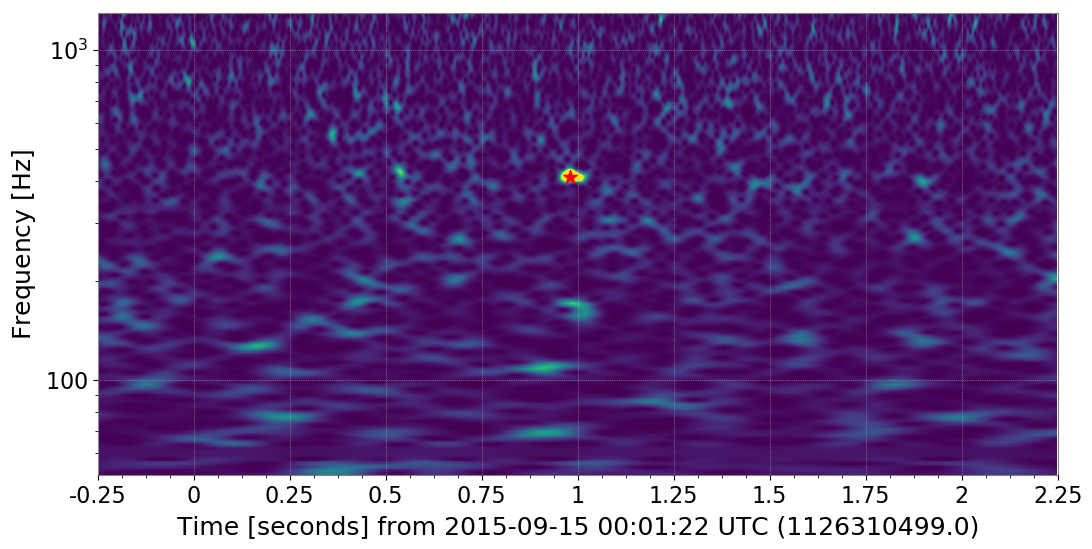

In [4]:
ax = plot.gca()
ax.scatter([peakgps], [peakfrequency], marker='*', color='red', s=100)
plot

ばっちり成功。

## トランジェントノイズ

ハードウェアインジェクションと同様に、GWデータには大きな信号が重力波信号に関連付けられていません。上記と同じ手順を使用して、さまざまな種類のグリッチをローカライズすることができます。

### 課題：

-  1132401017と1132401617（11月24日の2015 11：50-12：00）の間にHanfordのデータのどこかに「鯉」と呼ばれる短いグリッチがありますので、それを見つけてプロットしてください
- 1128779800の周りで「スクラッチ」と呼ばれる、微妙なブロードバンドノイズがあります。


In [3]:
%matplotlib inline

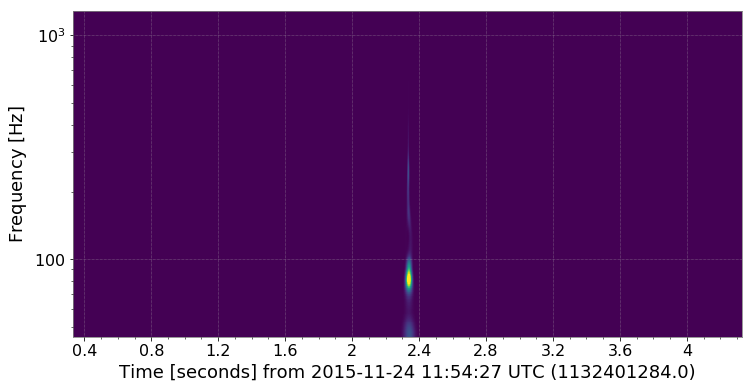

In [5]:
# format our times
injstart, injend = 1132401285.330, 1132401287.330
datastart = int(injstart) - 4
dataend = int(injend) + 4

# fetch the data
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', datastart, dataend, cache=True)

# generate the Q-transform
qtrans = hdata.q_transform(outseg=(injstart-1, injend+1))

# plot
plot = qtrans.plot(vmin=0, vmax=20000, yscale='log')
plot.show()